In [451]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier      # 분류
from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False


In [452]:
# numpy 형태
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

pandas 열 두 개 만들어서 학습시켜야 함 (2차원 구조)

In [453]:
# pandas 형태
# perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]

# df = pd.DataFrame([perch_length,perch_weight])
# df = df.T
# df

Text(0, 0.5, '무게')

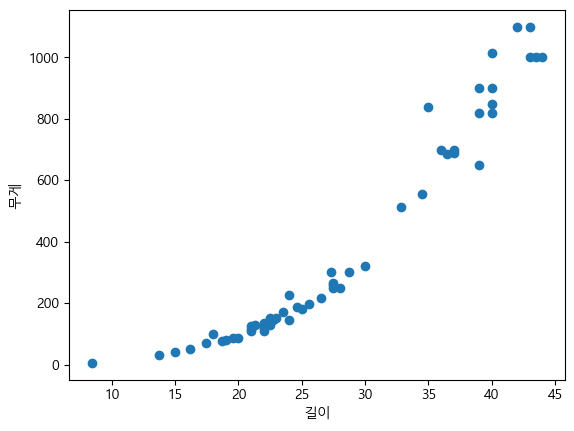

In [454]:
# 산점도로 출력하시오.
# x축은 길이, y축은 무게

plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')

# 머신러닝 구현
1. 데이터 전처리 - Nan, 0, 단위처리, 훈련세트, 테스트세트 분리
2. 데이터 학습
3. 데이터 예측      - 절대값 오차
4. 예측값 구하기

In [455]:

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight)



In [456]:
# 전처리(numpy) : 학습을 위한 2차원 행렬로 변경
train_input =  train_input.reshape(-1,1)
test_input =  test_input.reshape(-1,1)

# train_input.shape   # 42개
# test_input.shape    # 14개
# test_input.shape
# train_input

## reshape(a,b)   a행 b열로 변경. 
-1은 수에 제약이 없음/

사이즈를 맞춰줘야 함

In [457]:
#
arr1 = np.array([1,2,3,4,5,6])
arr1 = arr1.reshape(2,3)
arr1

# [1,2,3,4] >> [[1,2],[3,4]]
# arr1 = arr1.reshape(2,2)
# arr1


array([[1, 2, 3],
       [4, 5, 6]])

In [458]:
# [1,2,3,4] >> [[1],[2],[3],[4]]
arr1 = np.array([1,2,3,4])
arr1
# arr1 = arr1.reshape(-1,1)
# arr1

array([1, 2, 3, 4])

### knn 회귀 분석을 통해 농어의 무게를 예측하는 프로그램을 구현

In [459]:
# 데이터 학습하기
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)


KNeighborsRegressor()

In [460]:
# test_input 데이터 검증
knr.score(test_input, test_target)

0.9807994904569658

In [461]:
# 실제 train 데이터의 예측률은 어느 정도 나오는 지 확인
score = knr.score(train_input, train_target)
score

0.97396562463355

In [462]:

# 데이터 예측하기
# 예측 오차 범위 - 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
predict


array([831. , 131. , 581.8, 256.6,  82.6, 709. , 681.8,  82.6, 131. ,
        82.6, 977. , 977. ,  82.6, 977. ])

In [463]:
# 예측한 값과 실제값의 평균 절대값 오차

test_mean = mean_absolute_error(test_target,predict)
test_mean

39.81428571428571

## 그래프 구성

In [464]:
# 이웃의 개수를 축소 5>3
# 과소적합의 부분 문제를 해결

knr.n_neighbors = 3

# 이웃 개수 축소 후 훈련 다시 시키기
knr.fit(train_input, train_target)
knr.score(train_input,train_target)

# 과대적합 > 개수 늘림
# 과소적합 > 개수 줄임

0.9808979433014018

In [465]:

knr.score(test_input, test_target)

0.9825542308271973

In [467]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [468]:
len(perch_length)

56

### 그래프

In [474]:
arr = [[i] for i in range(5,45+1)]  # x축 좌표 
arr
# np.arange(5,46).reshape(-1,1)     >> 같은 거

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


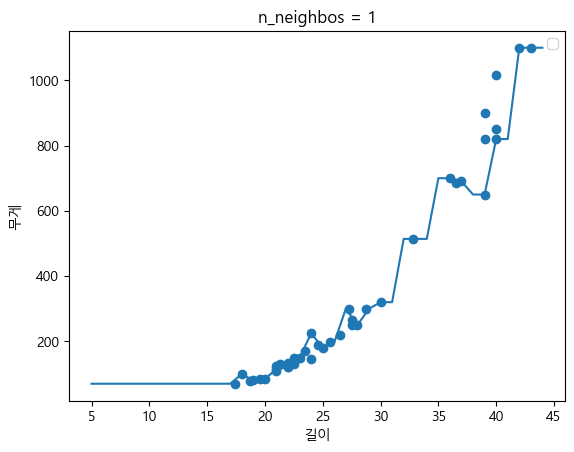

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


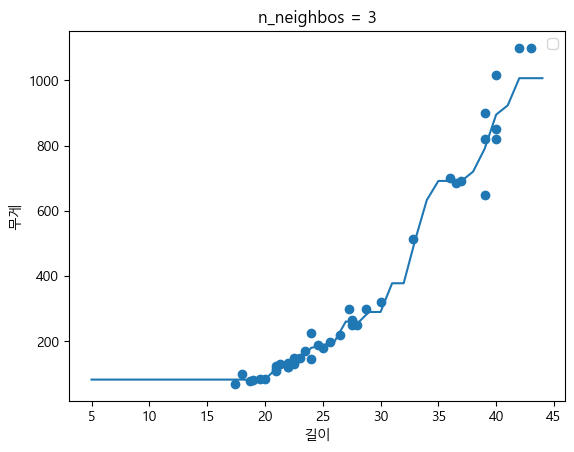

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


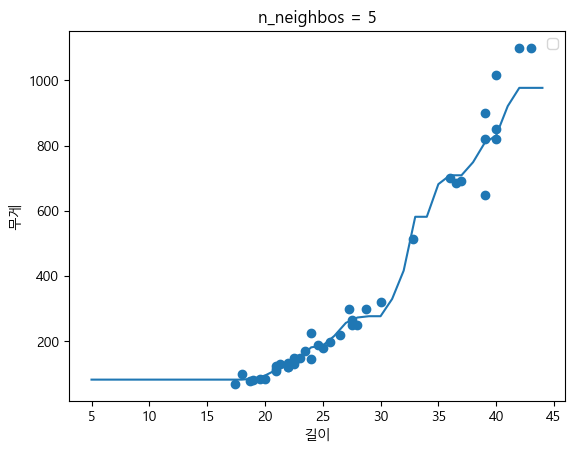

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


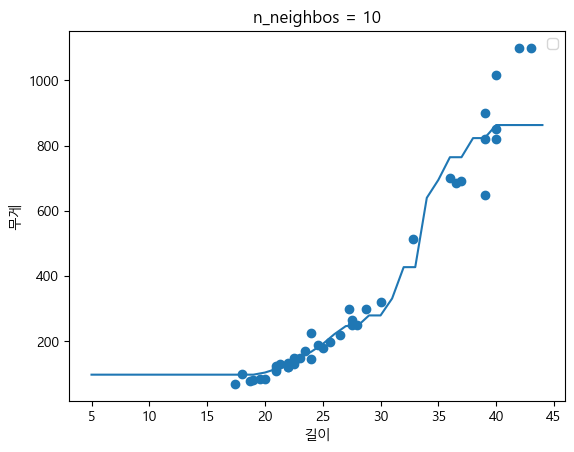

In [485]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,3,5,10]:  # n_neighbors = 1,5,10 예측률을 그래프로 표시
    knr.n_neighbors = n     # 데이터 개수 변경
    knr.fit(train_input,train_target)   
    
    # 배열로 만든 길이를 가지고 예측무게를 산출
    predict = knr.predict(x)
    
    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title('n_neighbos = {}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.legend(loc='upper right')
    plt.show()